In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tweepy
import seaborn as sns
import wordcloud

plt.rc("axes.spines", top=False, right=False)
sns.set_context("poster")
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
class TweetMiner(object):
    import auth_twitter
    # number of tweets per one pull; there is limit on this
    result_limit    =   20    
    data            =   []
    api             =   False
    
    twitter_keys = {
        'consumer_key':        auth_twitter.consumer_key,
        'consumer_secret':     auth_twitter.consumer_secret,
        'access_token_key':    auth_twitter.access_token,
        'access_token_secret': auth_twitter.access_token_secret
    }
    
    
    def __init__(self, keys_dict=twitter_keys, api=api, result_limit = 100):
        
        self.twitter_keys = keys_dict
        
        auth = tweepy.OAuthHandler(keys_dict['consumer_key'], keys_dict['consumer_secret'])
        auth.set_access_token(keys_dict['access_token_key'], keys_dict['access_token_secret'])
        
        self.api = tweepy.API(auth)
        self.twitter_keys = keys_dict
        
        self.result_limit = result_limit

    def mine_tweets_user(self, user="", last_tweet_id  =  False, max_pages=17):
        # keep track of last tweet id
        # multiply by the # of result_limit = total tweets
        data_page = []
        page =  1
        
        while page <= max_pages:
            if last_tweet_id:
                statuses   =   self.api.user_timeline(screen_name = user,
                                                     count = self.result_limit,
                                                     # get tweets older than last retrieved ones  
                                                     max_id = last_tweet_id - 1,
                                                     tweet_mode = 'extended',
                                                    )        
            else:
                statuses   =   self.api.user_timeline(screen_name=user,
                                                        count = self.result_limit,
                                                        tweet_mode = 'extended',
                                                        )
            for st in statuses:
                data_page.append(st._json)
                last_tweet_id = st.id

            page += 1
        # returns list of dict
        return data_page, last_tweet_id
    
    def mine_tweets_keyword(self, query = "", language = 'en', last_tweet_id  =  False,
                         max_pages=17):

        data_page = []
        page = 1
        
        while page <= max_pages:
            if last_tweet_id:
                statuses   =   self.api.search(q = query, lang = language,
                                                     count = self.result_limit,
                                                     # get tweets older than last retrieved ones  
                                                     max_id = last_tweet_id - 1,
                                                     tweet_mode = 'extended',
                                                    )        
            else:
                statuses   =   self.api.search(q = query, lang = language,
                                                        count = self.result_limit,
                                                        tweet_mode = 'extended',
                                                 )
    
            for st in statuses:
                data_page.append(st._json)
                last_tweet_id = st.id
            page += 1
        # returns list of dict
        return data_page, last_tweet_id

In [3]:
def get_status_text(df_row):
    #retweet
    if isinstance(df_row.retweeted_status, dict):
        text = df_row.retweeted_status['full_text']
    #quote
    elif isinstance(df_row.quoted_status, dict):
        text = df_row.quoted_status["full_text"]
    # regular tweet
    else:
        text = df_row['full_text']
    return text

### Mine tweets

In [43]:
miner = TweetMiner(result_limit = 100)
counter = 1
ls_master = []
q_word = 'khabib'
last_id = False
while counter < 20:
    print (counter)
    try:
        
        ls_tweets, last_tweet_id = miner.mine_tweets_keyword(query=q_word, language = 'en', 
                                       last_tweet_id = last_id, max_pages = 20)
        last_id = last_tweet_id
        ls_master.extend(ls_tweets)
    except:
        print ("Limit is reached")
#         time.sleep(16*60) #15 minute sleep time
        break
    if len(ls_tweets) < 1:
        break
        
    counter+=1

1
2
3
4
5
6


In [13]:
df_tweets = pd.DataFrame(ls_master)
df_tweets.head()


,created_at,id,id_str,full_text,truncated,display_text_range,entities,metadata,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,lang,quoted_status_id,quoted_status_id_str,quoted_status,extended_entities,withheld_in_countries
0,Thu Mar 18 21:04:46 +0000 2021,1372655237824184331,1372655237824184331,RT @TheZaneSimon: GSP definitely has the uniqu...,False,"[0, 89]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,...,0,False,False,False,en,NaN,NaN,NaN,NaN,NaN
1,Thu Mar 18 21:03:31 +0000 2021,1372654925956718594,1372654925956718594,bonus missions: \nput colby’s jaw back togethe...,False,"[0, 132]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,2,False,False,False,en,1.372626e+18,1372626137407385601,{'created_at': 'Thu Mar 18 19:09:07 +0000 2021...,NaN,NaN
2,Thu Mar 18 21:02:12 +0000 2021,1372654591976869890,1372654591976869890,GSP definitely has the unique perspective here...,False,"[0, 71]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://www.voxmedia.com"" rel=""nofollo...",NaN,...,4,False,False,False,en,NaN,NaN,NaN,NaN,NaN
3,Thu Mar 18 21:01:36 +0000 2021,1372654442764509186,1372654442764509186,RT @MMAFighting: Georges St-Pierre: UFC doesn’...,False,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,0,False,False,NaN,en,NaN,NaN,NaN,NaN,NaN
4,Thu Mar 18 21:00:32 +0000 2021,1372654172609347586,1372654172609347586,RT @BloodyElbow: The UFC doesn’t want Khabib t...,False,"[0, 120]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",NaN,...,0,False,False,False,en,NaN,NaN,NaN,NaN,NaN


In [14]:
print (df_tweets.shape)
for i in range(10):
    print (i)
    print (get_status_text(df_tweets.iloc[i]))

0
GSP definitely has the unique perspective here. https://t.co/FH8dFaJOfz
1
UFC still needs an open-world game, so many mission options:

- Smuggle potatoes to Ottman
- Kill Novitzky before he gets to Jon
- Find wine drunk Costa in a bar where everyone looks like Costa 
- Throw a boomerang at Colby’s head
- Kidnap and deliver Hans Molenkamp alive to Cruz
2
GSP definitely has the unique perspective here. https://t.co/FH8dFaJOfz
3
Georges St-Pierre: UFC doesn’t want Khabib Nurmagomedov to leave on his own terms – ‘they want a guy to beat him’ https://t.co/28mNR7p9vp https://t.co/Bd0yLojyLC
4
The UFC doesn’t want Khabib to leave ‘on his own terms,’ says Georges St-Pierre https://t.co/YOsqLCWW62
5
The UFC doesn’t want Khabib to leave ‘on his own terms,’ says Georges St-Pierre https://t.co/YOsqLCWW62
6
The UFC doesn’t want Khabib to leave ‘on his own terms,’ says Georges St-Pierre https://t.co/YOsqLCWW62
7
@whodatt249 Khabib gotta be the funniest person ever without even trying
8
@ysl_MMA @

In [26]:
df_tweets.shape, df_tweets.columns

((9389, 32),
 Index(['created_at', 'id', 'id_str', 'full_text', 'truncated',
        'display_text_range', 'entities', 'metadata', 'source',
        'in_reply_to_status_id', 'in_reply_to_status_id_str',
        'in_reply_to_user_id', 'in_reply_to_user_id_str',
        'in_reply_to_screen_name', 'user', 'geo', 'coordinates', 'place',
        'contributors', 'retweeted_status', 'is_quote_status', 'retweet_count',
        'favorite_count', 'favorited', 'retweeted', 'possibly_sensitive',
        'lang', 'quoted_status_id', 'quoted_status_id_str', 'quoted_status',
        'extended_entities', 'withheld_in_countries'],
       dtype='object'))

Text(0.5, 21.919999999999973, 'log10 retweets')

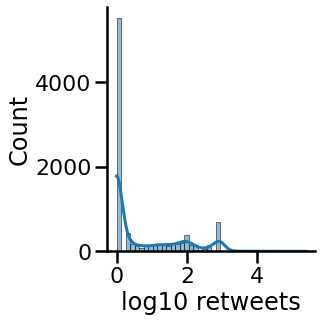

In [16]:
sns.set_context("poster")
sns.displot(np.log10(df_tweets.retweet_count+1), kde= True)
plt.xlabel("log10 retweets")

In [17]:
import datetime, time 
from matplotlib.dates import DateFormatter

In [18]:
time.strftime('%Y-%m-%d %H:%M:%S', time.strptime(df_tweets.iloc[0]['created_at'],'%a %b %d %H:%M:%S +0000 %Y'))

'2021-03-18 21:04:46'

In [19]:
tmp = pd.DatetimeIndex(df_tweets["created_at"])
ones = [1]*len(tmp)
tmp = pd.DataFrame(ones, index = tmp)
tmp = tmp.resample('5T').sum().fillna(0).reset_index()
tmp.columns = ['date', 'freq']

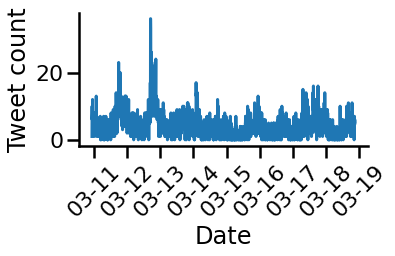

In [23]:
f, ax = plt.subplots()
ax = sns.lineplot(data = tmp, x = 'date', y = 'freq')
date_form = DateFormatter("%m-%d")
ax.xaxis.set_major_formatter(date_form)
ax.set_xlabel('Date')
ax.set_ylabel('Tweet count')
plt.xticks(rotation = 45)
plt.tight_layout()

In [27]:
from nltk.tokenize import TweetTokenizer
import string
from collections import Counter
from nltk.corpus import stopwords
tweet_tokenizer = TweetTokenizer()

In [28]:
# select relevant info
df_tweets_2 = df_tweets[["created_at", "id", "retweet_count", "favorite_count"]]
df_tweets_2.loc[:, "followers_count"] = df_tweets["user"].apply(lambda x: x["followers_count"])
df_tweets_2.loc[:, "friends_count"] = df_tweets["user"].apply(lambda x: x["friends_count"])
df_tweets_2.loc[:, "text"] = df_tweets.apply(get_status_text, axis = 1)
tmp = df_tweets["user"].apply(lambda x: x["id"])
df_tweets_2["user_id"] = tmp
tmp = df_tweets["user"].apply(lambda x: x["description"])
df_tweets_2["user_bio"] = tmp
df_tweets_2.head()

C:\Users\AChub_Lab\anaconda3\envs\twiapp\lib\site-packages\pandas\core\indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\AChub_Lab\anaconda3\envs\twiapp\lib\site-packages\pandas\core\indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
C:\Users\AChub_Lab\anaconda3\envs\twiapp\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.


,created_at,id,retweet_count,favorite_count,followers_count,friends_count,text,user_id,user_bio
0,Thu Mar 18 21:04:46 +0000 2021,1372655237824184331,1,0,587,4346,GSP definitely has the unique perspective here...,742811035485245441,Words @curaffairs @thechallengebl | Past: @gre...
1,Thu Mar 18 21:03:31 +0000 2021,1372654925956718594,0,2,272,426,"UFC still needs an open-world game, so many mi...",1328107817413304320,mma | football
2,Thu Mar 18 21:02:12 +0000 2021,1372654591976869890,1,4,8610,640,GSP definitely has the unique perspective here...,1201505616,Associate Editor for Bloody Elbow. UFC roster ...
3,Thu Mar 18 21:01:36 +0000 2021,1372654442764509186,105,0,1162,1184,Georges St-Pierre: UFC doesn’t want Khabib Nur...,1265893468007792640,MMA & Sports 🔥🔥🔥
4,Thu Mar 18 21:00:32 +0000 2021,1372654172609347586,2,0,195,653,The UFC doesn’t want Khabib to leave ‘on his o...,276230487,"A Dgenerate Gambler always ready for sports,po..."


In [29]:
punctuation = list(string.punctuation)
stop = stopwords.words('english') + punctuation

In [32]:
data = df_tweets_2.drop_duplicates(subset = ["id", "text"]).reset_index(drop = True)
# for i in data.text.values:
#     print(tweet_tokenizer.tokenize(i))
    

['GSP', 'definitely', 'has', 'the', 'unique', 'perspective', 'here', '.', 'https://t.co/FH8dFaJOfz']
['UFC', 'still', 'needs', 'an', 'open-world', 'game', ',', 'so', 'many', 'mission', 'options', ':', '-', 'Smuggle', 'potatoes', 'to', 'Ottman', '-', 'Kill', 'Novitzky', 'before', 'he', 'gets', 'to', 'Jon', '-', 'Find', 'wine', 'drunk', 'Costa', 'in', 'a', 'bar', 'where', 'everyone', 'looks', 'like', 'Costa', '-', 'Throw', 'a', 'boomerang', 'at', 'Colby', '’', 's', 'head', '-', 'Kidnap', 'and', 'deliver', 'Hans', 'Molenkamp', 'alive', 'to', 'Cruz']
['GSP', 'definitely', 'has', 'the', 'unique', 'perspective', 'here', '.', 'https://t.co/FH8dFaJOfz']
['Georges', 'St-Pierre', ':', 'UFC', 'doesn', '’', 't', 'want', 'Khabib', 'Nurmagomedov', 'to', 'leave', 'on', 'his', 'own', 'terms', '–', '‘', 'they', 'want', 'a', 'guy', 'to', 'beat', 'him', '’', 'https://t.co/28mNR7p9vp', 'https://t.co/Bd0yLojyLC']
['The', 'UFC', 'doesn', '’', 't', 'want', 'Khabib', 'to', 'leave', '‘', 'on', 'his', 'own', 't

['@fightoracle', 'Chandler', 'Khabib', 'would', 'be', 'nice', '.']
['@TonyFergusonXT', '@TeamKhabib', '@danawhite', 'Khabib', 'would', 'turn', 'you', 'into', 'a', 'kebab']
['@overhandbombs', '@Jeremia71512691', 'Go', 'to', 'Russia', 'and', 'everyone', 'will', 'be', 'saying', 'Khabib', '.', 'Go', 'to', 'India', 'or', 'Pakistan', 'and', 'most', 'of', 'them', 'will', 'be', 'saying', 'Khabib', 'as', 'well', '.']
['@orlandpickles1', '@Theirishdragon1', '@joeexoticrogan_', '@arielhelwani', 'And', 'Khabib', 'fought', 'in', 'the', 'hardest', 'and', 'most', 'competitive', 'division', 'in', 'UFC', 'and', 'Amanda', '...', 'well', '🤷', '\u200d', '♂', '️', 'Definitely', 'she', "can't", 'be', 'compared', 'with', 'Khabib']
['@Theirishdragon1', '@stargazer109', '@joeexoticrogan_', '@arielhelwani', 'How', '?', 'Nunes', 'has', 'lost', '4', 'fights', 'and', 'Khabib', 'has', 'never', 'lost', ',', 'been', 'bruised', ',', 'cut', ',', 'bleed', ',', 'or', 'even', 'as', 'much', 'as', 'swollen', 'ONCE']
['I', '

['Khabib', 'meets', 'with', 'Lorenzo', 'Fertitta', ',', 'teases', 'UFC', 'return', 'https://t.co/y32JO7hzHT']
['TUF', 'Khabib', 'please', '🙏', '🏻', '🙏', '🏻', '🙏', '🏻', 'https://t.co/wsZaraqWWL']
['Khabib', 'Nurmagomedov', 'went', 'from', '350k', 'PPV', 'to', '2.4', 'Mil', 'PPV', 'and', 'then', 'to', '800k', 'PPV', '.', 'Conor', 'McGregor', 'does', 'change', 'people', '’', 's', 'lives', '.', 'https://t.co/95yiEAhxtE']
['Khabib', 'meets', 'with', 'Lorenzo', 'Fertitta', ',', 'teases', 'UFC', 'return', '(', '@antontabuena', ')', 'https://t.co/1zwLBSeI0M']
['@RandomBurnerrr', '@NasAlDossary', '@trevorchanceb', '@MikeChandlerMMA', 'if', 'he', 'was', 'there', 'training', 'for', 'Khabib', 'or', 'justin', 'surely', 'he', "could've", 'taken', 'Islam', 'as', 'the', 'styles', 'r', 'identical', '.', 'Truth', 'Is', 'Chandler', 'has', 'no', 'balls', '.']
['Khabib', 'Nurmagomedov', 'went', 'from', '350k', 'PPV', 'to', '2.4', 'Mil', 'PPV', 'and', 'then', 'to', '800k', 'PPV', '.', 'Conor', 'McGregor', '

['Imagine', 'in', 'a', 'calendar', 'year', ':', 'Conor', 'Loses', 'Izzy', 'Loses', 'Masvidal', 'Loses', 'x2', 'Khabib', 'retires', 'First', 'ever', 'belt', 'decdided', 'by', 'disqualification', 'Jon', 'Jones', 'hasn', '’', 't', 'fought', 'Still', 'the', 'fastest', 'growing', 'sport', 'in', 'the', 'world', '...']
['Reminder', ':', 'Deron', 'winn', 'pinned', 'kamaru', 'usman']
['@MMARoasted', 'True', 'or', 'false', ',', '@MMARoasted', ':', 'Season', '3', 'of', '@YouNetflix', 'will', 'be', 'several', 'scenes', 'of', 'Khabib', 'trying', 'to', 'retire', 'and', 'Dana', 'saying', '“', 'he', '’', 's', 'not', 'done', 'yet', ',', 'he', '’', 's', 'still', 'mine', '!', '”', 'https://t.co/cNBGgK1ycU']
['@MMARoasted', 'True', 'or', 'false', ',', '@MMARoasted', ':', 'Season', '3', 'of', '@YouNetflix', 'will', 'be', 'several', 'scenes', 'of', 'Khabib', 'trying', 'to', 'retire', 'and', 'Dana', 'saying', '“', 'he', '’', 's', 'not', 'done', 'yet', ',', 'he', '’', 's', 'still', 'mine', '!', '”', 'https://

['@joeporter99', '@Trav1s_James', '@Ollieslost', '@KGBlmfao', '“', 'Fan', 'boys', '”', '😂', 'that', '’', 's', 'like', 'still', 'saying', '“', 'Connor', 'would', 'kill', 'khabib', '”', 'and', 'forgets', 'they', 'fought']
['@StreetBaroni', '@TeamKhabib', '@Showtimepettis', '2014', 'khabib', 'was', 'nothing', 'compared', 'to', 'what', 'he', 'is', 'now', 'and', 'pettis', 'would', 'win', 'easily']
['@StreetBaroni', '@TeamKhabib', '@Showtimepettis', 'Easy', 'for', 'khabib', 'RDA', 'mauling', 'pettis', 'for', 'belt', 'And', 'khabib', 'beat', 'RDA', 'before', 'that']
['@Nasrat_mma', '@AliAbdelaziz00', 'The', 'best', 'style', 'unmatched', 'is', 'from', '@TeamKhabib', 'we', 'are', 'talking', 'about', 'a', 'talent', 'like', 'never', 'before', ',', 'such', 'a', 'dominating', 'mauling', 'perfectionist', 'like', '@joerogan', 'states', '.', 'Ali', '&', '@danawhite', 'need', 'to', 'do', 'more', 'bring', 'Khabib', 'back', 'in', 'the', 'game', '!', 'He', 'could', 'easily', 'dominate', 'for', '10years', 

['I', '’', 'll', 'make', 'sure', 'Khabib', 'keeps', 'enjoying', 'his', 'retirement', '.', 'Let', '’', 's', 'go', '👊', '🏼', 'https://t.co/OJwuVYNeln', 'https://t.co/Nyb26BCe9W']
['@Sweeegu', 'Back', 'then', 'Rafael', 'was', 'champ', ',', 'now', 'he', 'wants', 'one', 'IF', 'he', 'beats', 'Islam.Khabib', 'has', 'said', 'before', 'that', 'he', 'would', 'fight', 'whoever', 'beats', 'Islam', '.', "That's", 'his', 'reasoning', 'why', "I'm", 'guessing', '.']
['When', 'I', 'had', 'the', 'belt', 'I', 'asked', 'Ali', 'who', 'was', 'my', 'manager', 'at', 'the', 'time', 'for', 'a', 'rematch', 'with', 'Khabib', 'but', 'Ali', 'always', 'protected', 'his', 'friend', 'and', 'kept', 'him', 'alway', 'from', 'me', '.', 'I', 'have', 'no', 'problem', 'to', 'fight', '@MAKHACHEVMMA', 'but', 'if', 'his', 'team', 'believes', 'in', 'him', 'so', 'much', 'I', 'need', '@TeamKhabib', 'word', 'he', 'will', 'fight', 'me', 'next', '.']
['@RdosAnjosMMA', '@MAKHACHEVMMA', '@TeamKhabib', 'Khabib', 'clapped', 'your', 'ass'

['@HBicchu', '@AliAbdelaziz00', 'How', 'is', 'khabib', 'tko', 'tony', '.', 'Khabib', 'has', 'pillow', 'hands']
['Joe', 'Rogan', 'and', 'Derick', 'Lewis', 'today', '.', 'on', 'Khabib', ':', '"', 'When', 'Khabib', 'was', 'Fcking', 'up', 'Conor', 'when', 'he', 'was', 'pounding', 'on', 'him', 'and', 'going', '“', 'Lets', 'talk', 'now', '”', ',', 'Conor', 'goes', 'it', '’', 's', 'just', 'business', '..', 'this', 'is', 'not', 'just', 'business', '.', '"', 'On', 'Islam', ':', '"', 'That', 'dude', 'is', 'a', 'bad', 'mother', 'fcker', ',', 'he', '’', 's', 'for', 'real', ',', 'that', 'grappling', 'is', 'serious', '.', '"', 'https://t.co/g1Dfci6YxM']
['@healthyrob35', 'khabib', 'is', 'probably', 'on', 'some', 'shit']
['There', 'was', 'many', 'doubters', 'prior', 'to', "Khabib's", 'fight', 'with', 'Gaetje', '.', 'Not', 'the', 'Polish', 'power', '.', 'Mystic', 'Jan', 'knew', "what's", 'up', '.', '"', 'Second', 'or', 'third', 'round', ',', 'ground', 'and', 'pound', 'or', 'submission', '"', 'https://

['Khabib', 'staying', 'very', 'much', 'on', 'brand', '😁', '(', 'via', 'UFC', '259', ':', 'The', 'Thrill', 'and', 'the', 'Agony', ')', 'https://t.co/AJGsu62WMy']
['Khabib', 'staying', 'very', 'much', 'on', 'brand', '😁', '(', 'via', 'UFC', '259', ':', 'The', 'Thrill', 'and', 'the', 'Agony', ')', 'https://t.co/AJGsu62WMy']
['@samkirkby15', '@stallone610', '@CouchlockedMMA', '@JonnyBones', 'I', 'disagree', 'man', '.', 'Jon', 'Jones', 'is', 'incredible', 'but', 'he', 'has', 'cheated', 'before', '(', 'not', 'significant', ')', ',', 'he', "didn't", 'dominate', 'like', 'Khabib', 'did', 'and', 'had', 'close', 'fights', 'with', 'Santos', ',', 'Gustafson', 'and', 'Reyes']
['Khabib', 'staying', 'very', 'much', 'on', 'brand', '😁', '(', 'via', 'UFC', '259', ':', 'The', 'Thrill', 'and', 'the', 'Agony', ')', 'https://t.co/AJGsu62WMy']
['@SNM1Michael', '@arielhelwani', 'Why', 'do', 'you', 'always', 'cry', 'about', 'Khabib', 'and', 'his', 'teammates', '24/7', '?']
['Khabib', 'staying', 'very', 'much', '

['Jon', 'Jones', 'has', 'more', 'UFC', 'title', 'victories', 'than', 'Khabib', 'has', 'fights', 'in', 'the', 'promotion']
['@stargazer109', '@JonnyBones', 'How', 'many', 'undisputed', 'champions', 'Khabib', 'has', 'beat', '?']
['Jon', 'Jones', 'has', 'more', 'UFC', 'title', 'victories', 'than', 'Khabib', 'has', 'fights', 'in', 'the', 'promotion']
['@Oc280', '@stargazer109', '@JonnyBones', 'Khabib', 'doesn', '’', 't', 'mop', 'the', 'floor', 'with', 'anyone', 'except', 'arguably', 'Gaethje', ',', 'what', 'are', 'you', 'talking', 'about', '?', 'The', 'man', 'hugs', 'legs', 'for', 'a', 'living', 'until', 'his', 'opponents', 'give', 'up', 'and', 'then', 'he', 'goes', 'for', 'the', 'easy', 'sub', '.', 'The', 'fight', 'business', 'is', 'the', 'entertainment', 'business', ',', 'that', '’', 's', 'why', 'you', 'don', '’', 't', '“', 'mop', 'the', 'floor', '”', '🤣']
['Thank', 'you', 'guys', 'for', 'the', 'support', ',', 'just', 'to', 'let', 'you', 'know', 'at', '50', 'followers', 'we', 'will', 'be

['If', 'you', 'find', 'me', 'a', 'picture', 'of', 'Khabib', 'having', '11', 'title', 'defenses', ',', 'I', 'will', 'leave', 'MMA', 'Twitter', '👍', 'All', 'the', 'Best', '😊', 'https://t.co/gg55AOQfYL']
['@YalIMustaForgot', '@TheBigMeer', 'I', 'mean', '2', 'million', 'against', 'Khabib', 'and', 'at', 'a', 'time', 'when', 'Khabib', 'was', 'barley', 'known', 'to', 'the', 'public', 'and', 'made', 'people', 'care', 'for', 'Khabib', 'just', 'saying']
['@Beherit77825988', '@espnmma', '@TeamKhabib', 'Yes', '.', 'He', 'is', 'a', 'pussy', 'scared', 'to', 'go', 'to', '170', 'and', 'fight', '.', 'Pussy', 'scared', 'to', 'fight', 'at', '170', '.', 'Conor', 'is', 'no', 'goat', '.', 'Criticise', 'Khabib', 'and', 'Khabib', 'fans', 'come', 'crying', 'on', 'Conor', '.', 'Typical', '.', '😂', '😂', '😂']
['@ulises90425719', '@CriticaI_Damage', 'Khabib', '🤝', 'Jones', 'Being', 'undefeated', 'Your', 'favorite', 'could', 'never', 'relate', '😹']
['The', 'Midwestern', 'version', 'of', 'Khabib', 'wrestling', 'a', 

['@JonnyBones', '💊', '💉', '💉', '💉', '💊', '💊', 'Jon', 'you', 'are', 'a', 'hater', '...', 'You', 'hate', 'Khabib', '...']
['Khabib', 'fans', 'under', 'any', 'post', 'to', 'do', 'with', 'Conor', 'McGregor', 'https://t.co/DGwKDASwei']
['@Khabib21287190', '@JonnyBones', 'Khabib', 'is', 'a', 'good', 'second', 'best']
['I', '’', 'll', 'make', 'sure', 'Khabib', 'keeps', 'enjoying', 'his', 'retirement', '.', 'Let', '’', 's', 'go', '👊', '🏼', 'https://t.co/OJwuVYNeln', 'https://t.co/Nyb26BCe9W']
['@InspiredByNip', '@kunal44j', '@philthemmadude', 'Nope', "it's", 'only', 'an', 'illusion', 'to', 'delusional', 'Conor', 'fans', ',', 'all', "he's", 'done', 'in', 'the', 'past', '5', 'years', 'is', 'beat', 'on', 'an', 'old', 'man', 'with', 'CTE', 'who', "wouldn't", 'have', 'a', 'chance', 'in', 'his', 'prime', 'while', 'Dustin', 'has', 'been', 'beating', 'every', 'elite', 'at', 'LW', 'not', 'named', 'Khabib']
['I', '’', 'll', 'make', 'sure', 'Khabib', 'keeps', 'enjoying', 'his', 'retirement', '.', 'Let', 

In [33]:
count_terms = Counter()
count_hash = Counter()

for idx in data.index[:]:
    text = data.iloc[idx].text.lower()
    if len(text) < 5:
        continue
    terms_hash = [term for term in tweet_tokenizer.tokenize(text) 
              if term not in stop and len(term) > 3 and term.startswith('#')]
    terms_only = [term for term in tweet_tokenizer.tokenize(text) 
              if term not in stop and len(term) > 3 and
              not term.startswith(('#', '@'))] 

    # Update the counter
    count_hash.update(terms_hash)
    count_terms.update(terms_only)

print(count_hash.most_common(10))
print(count_terms.most_common(10))

[('#ufc', 197), ('#khabib', 166), ('#mma', 99), ('#ufc259', 68), ('#mmatwitter', 53), ('#asimriaz', 25), ('#ufcvegas21', 21), ('#khabibnurmagomedov', 20), ('#mcgregor', 20), ('#danawhite', 16)]
[('khabib', 9614), ('fight', 1786), ('conor', 1147), ('much', 1057), ('like', 1051), ('jones', 897), ('would', 791), ('thrill', 712), ('agony', 712), ('staying', 709)]


In [34]:
df_tweets_2.drop_duplicates(subset = ["id", "text"])

,created_at,id,retweet_count,favorite_count,followers_count,friends_count,text,user_id,user_bio
0,Thu Mar 18 21:04:46 +0000 2021,1372655237824184331,1,0,587,4346,GSP definitely has the unique perspective here...,742811035485245441,Words @curaffairs @thechallengebl | Past: @gre...
1,Thu Mar 18 21:03:31 +0000 2021,1372654925956718594,0,2,272,426,"UFC still needs an open-world game, so many mi...",1328107817413304320,mma | football
2,Thu Mar 18 21:02:12 +0000 2021,1372654591976869890,1,4,8610,640,GSP definitely has the unique perspective here...,1201505616,Associate Editor for Bloody Elbow. UFC roster ...
3,Thu Mar 18 21:01:36 +0000 2021,1372654442764509186,105,0,1162,1184,Georges St-Pierre: UFC doesn’t want Khabib Nur...,1265893468007792640,MMA & Sports 🔥🔥🔥
4,Thu Mar 18 21:00:32 +0000 2021,1372654172609347586,2,0,195,653,The UFC doesn’t want Khabib to leave ‘on his o...,276230487,"A Dgenerate Gambler always ready for sports,po..."
...,...,...,...,...,...,...,...,...,...
9384,Wed Mar 10 22:37:12 +0000 2021,1369779400422666240,400,0,23,329,I’ll make sure Khabib keeps enjoying his retir...,4814516163,
9385,Wed Mar 10 22:36:21 +0000 2021,1369779183178637313,400,0,649,51,I’ll make sure Khabib keeps enjoying his retir...,1134384827233382402,@teamKhabib 🦁🇦🇱
9386,Wed Mar 10 22:35:26 +0000 2021,1369778954345791494,1,6,356,376,This is random but if you put Khabib above Jon...,2256721589,
9387,Wed Mar 10 22:35:00 +0000 2021,1369778843800768517,2,32,1481086,2245,Khabib's already made a huge impression as a c...,15332636,"News, videos and more from the world’s biggest..."


In [35]:
from nltk.tokenize import TweetTokenizer
import re
import operator 
from collections import Counter
from nltk.corpus import stopwords
import string
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sian = SentimentIntensityAnalyzer()
from textblob import TextBlob

In [36]:
punctuation = list(string.punctuation)
stop = stopwords.words('english') + punctuation 
emoticons_str = r"""
(?:
    [:=;] # Eyes
    [oO\-]? # Nose (optional)
    [D\)\]\(\]/\\OpP] # Mouth
)"""
regex_str = [
    emoticons_str,
    r'<[^>]+>', # HTML tags
    r'(?:@[\w_]+)', # @-mentions
    r"(?:\#+[\w_]+[\w\'_\-]*[\w_]+)", # hash-tags
    r'http[s]?://(?:[a-z]|[0-9]|[$-_@.&amp;+]|[!*\(\),]|(?:%[0-9a-f][0-9a-f]))+', # URLs
    r'\n',
    r"^\s+|\s+$"
]
cleaner_re = re.compile(r'('+'|'.join(regex_str)+')', re.VERBOSE | re.IGNORECASE)
def process_tweet(tweet): 
    return cleaner_re.sub("", tweet)

In [37]:
 d_txtblob = {}
d_vader = {}

count_terms = Counter()
count_hash = Counter()


for idx in df_tweets_2.index[:]:
    text = df_tweets_2.iloc[idx].text.lower()
    if len(text) < 5:
        continue
    cleaned_text = process_tweet(text)
    tweet_id = df_tweets_2.iloc[idx].id 

    # word freqeuncy
    terms_hash = [term for term in tweet_tokenizer.tokenize(text) 
            if term not in stop and len(term) > 3 and term.startswith('#')]
    terms_only = [term for term in tweet_tokenizer.tokenize(text) 
            if term not in stop and len(term) > 3 and
            not term.startswith(('#', '@'))] 

    # Update the counter
    count_hash.update(terms_hash)
    count_terms.update(terms_only)

    # sentiment analysis
    try:
        compound = sian.polarity_scores(cleaned_text)["compound"]
        d_vader[tweet_id] = round(compound, 5)

        txtblob = TextBlob(cleaned_text).sentiment[0]
        d_txtblob[tweet_id] = round(txtblob, 5)

    except Exception as e: 
        print (str(e))

In [38]:
df_tweets_2.loc[:, "txtblob"] = df_tweets_2["id"].map(d_txtblob)
df_tweets_2.loc[:, "vader"] = df_tweets_2["id"].map(d_vader)
df_tweets_2.head()

C:\Users\AChub_Lab\anaconda3\envs\twiapp\lib\site-packages\pandas\core\indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\AChub_Lab\anaconda3\envs\twiapp\lib\site-packages\pandas\core\indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


,created_at,id,retweet_count,favorite_count,followers_count,friends_count,text,user_id,user_bio,txtblob,vader
0,Thu Mar 18 21:04:46 +0000 2021,1372655237824184331,1,0,587,4346,GSP definitely has the unique perspective here...,742811035485245441,Words @curaffairs @thechallengebl | Past: @gre...,0.1875,0.4019
1,Thu Mar 18 21:03:31 +0000 2021,1372654925956718594,0,2,272,426,"UFC still needs an open-world game, so many mi...",1328107817413304320,mma | football,-0.0750,-0.6808
2,Thu Mar 18 21:02:12 +0000 2021,1372654591976869890,1,4,8610,640,GSP definitely has the unique perspective here...,1201505616,Associate Editor for Bloody Elbow. UFC roster ...,0.1875,0.4019
3,Thu Mar 18 21:01:36 +0000 2021,1372654442764509186,105,0,1162,1184,Georges St-Pierre: UFC doesn’t want Khabib Nur...,1265893468007792640,MMA & Sports 🔥🔥🔥,0.6000,0.1027
4,Thu Mar 18 21:00:32 +0000 2021,1372654172609347586,2,0,195,653,The UFC doesn’t want Khabib to leave ‘on his o...,276230487,"A Dgenerate Gambler always ready for sports,po...",0.6000,0.0258


C:\Users\AChub_Lab\anaconda3\envs\twiapp\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


Text(0.5, -0.04, 'common X')

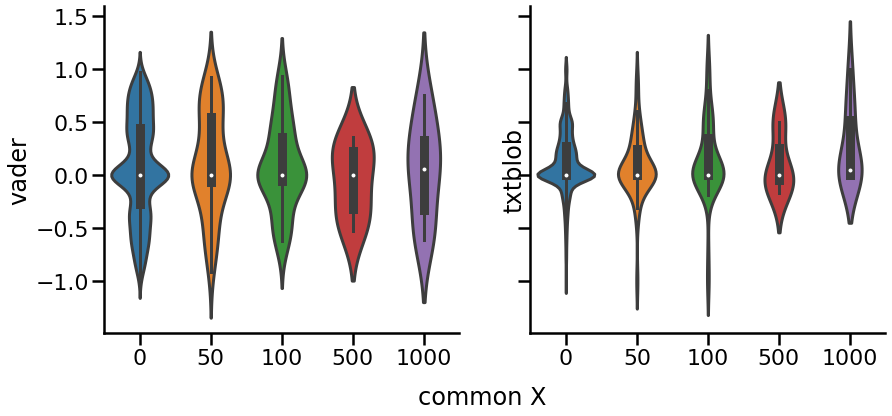

In [39]:
models= ["vader", "txtblob"]
x = "favorite_count"
bins = [0, 50, 100, 500, 1000, 2e7]
df_tweets_2[x + "_cut"] = pd.cut(df_tweets_2[x], bins = bins,  labels= bins[:-1]) 

fig, ax = plt.subplots(1, 2, figsize = (14, 6), sharey = True, sharex = True)
for idx, m in enumerate(models):  
    sns.violinplot(x = x + "_cut", y = m, data = df_tweets_2, ax = ax[idx])
    ax[idx].set_xlabel("")
fig.text(0.5, -0.04, 'common X', ha='center')
# plt.savefig("sentim-by-{}.png".format(x))

In [40]:
df_tweets_2.columns

Index(['created_at', 'id', 'retweet_count', 'favorite_count',
       'followers_count', 'friends_count', 'text', 'user_id', 'user_bio',
       'txtblob', 'vader', 'favorite_count_cut'],
      dtype='object')

In [41]:
df_tweets_2["created_at"] = pd.DatetimeIndex(df_tweets_2["created_at"])
df_tweets_2[["created_at", m]].set_index("created_at").resample('1T').mean().reset_index()

C:\Users\AChub_Lab\anaconda3\envs\twiapp\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,created_at,txtblob
0,2021-03-10 22:33:00+00:00,0.500000
1,2021-03-10 22:34:00+00:00,NaN
2,2021-03-10 22:35:00+00:00,0.143335
3,2021-03-10 22:36:00+00:00,0.500000
4,2021-03-10 22:37:00+00:00,0.500000
...,...,...
11427,2021-03-18 21:00:00+00:00,0.600000
11428,2021-03-18 21:01:00+00:00,0.600000
11429,2021-03-18 21:02:00+00:00,0.187500
11430,2021-03-18 21:03:00+00:00,-0.075000


In [42]:
df_tweets_2.head()

,created_at,id,retweet_count,favorite_count,followers_count,friends_count,text,user_id,user_bio,txtblob,vader,favorite_count_cut
0,2021-03-18 21:04:46+00:00,1372655237824184331,1,0,587,4346,GSP definitely has the unique perspective here...,742811035485245441,Words @curaffairs @thechallengebl | Past: @gre...,0.1875,0.4019,NaN
1,2021-03-18 21:03:31+00:00,1372654925956718594,0,2,272,426,"UFC still needs an open-world game, so many mi...",1328107817413304320,mma | football,-0.0750,-0.6808,0
2,2021-03-18 21:02:12+00:00,1372654591976869890,1,4,8610,640,GSP definitely has the unique perspective here...,1201505616,Associate Editor for Bloody Elbow. UFC roster ...,0.1875,0.4019,0
3,2021-03-18 21:01:36+00:00,1372654442764509186,105,0,1162,1184,Georges St-Pierre: UFC doesn’t want Khabib Nur...,1265893468007792640,MMA & Sports 🔥🔥🔥,0.6000,0.1027,NaN
4,2021-03-18 21:00:32+00:00,1372654172609347586,2,0,195,653,The UFC doesn’t want Khabib to leave ‘on his o...,276230487,"A Dgenerate Gambler always ready for sports,po...",0.6000,0.0258,NaN


### Clustering Users

In [223]:
import itertools
import hdbscan
from nltk.tokenize.casual import TweetTokenizer
# from sklearn.externals import joblib
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import silhouette_score
from sklearn.decomposition import TruncatedSVD
# from MulticoreTSNE import MulticoreTSNE as TSNE
import logging
# import yaml

In [193]:
def replace_urls(in_string, replacement=None):
    """Replace URLs in strings. See also: ``bit.ly/PyURLre``

    Args:
        in_string (str): string to filter
        replacement (str or None): replacment text. defaults to '<-URL->'

    Returns:
        str
    """
    replacement = '<-URL->' if replacement is None else replacement
    pattern = re.compile('(https?://)?(\w*[.]\w+)+([/?=&]+\w+)*')
    return re.sub(pattern, replacement, in_string)

In [266]:
def my_tokenizer(in_string):
    """
    Convert `in_string` of text to a list of tokens using NLTK's TweetTokenizer
    """
    # reasonable, but adjustable tokenizer settings
    tokenizer = TweetTokenizer(preserve_case=False,
                               reduce_len=True,
                               strip_handles=True)
    tokens = tokenizer.tokenize(in_string)
    tokens = [word for word in tokens if len(word) > 2]
    return tokens

In [195]:
def make_punc_stopwords(max_length=4):
    """Generates punctuation 'words' up to
    ``max_length`` characters.
    """
    def punct_maker(length):
        return ((''.join(x) for x in itertools.product(string.punctuation,
                                                repeat=length)))
    words = itertools.chain.from_iterable((punct_maker(length)
                                    for length in range(max_length+1)))
    return list(words)

In [196]:
my_stopwords = list(itertools.chain(stop, make_punc_stopwords(max_length=4)))

In [273]:
unique_user_cnt

12834

In [343]:
dict(zip(df_tweets_2.user_id.values, df_tweets_2.user_bio.values))

{2280530800: 'XO’ | @Manutd',
 1227917482070953986: '20 .\nLive , Love, Laugh 💙🎨🦄',
 3180381502: 'I train jiujitsu',
 1113861692805525507: '',
 1258648224: 'The good, the bad, Allhamdulilah for it all.',
 454774938: 'PhD Candidate specializing in Iranian Foreign Policy. طالب دكتوراه متخصص في الشؤون الخارجية الإيرانية.',
 1514346691: 'if you came here to find things to make fun of it’s not in my bio.',
 1263531360385470465: 'COOKIN BEATS, HOOPING OR PODCASTING, HERE TO INSPIRE! producer, podcaster, hooper, motivator! TOP OF THE TOP 🏁 Straight2DaLeague on SoundCloud!',
 1306453312833757184: '',
 1297601035050061825: 'Believer, hard worker, former Cop/fighter, proud American, MMA, Dog lover, 2nd amendment supporter, firearm carrier, sports fan, and Chess player.',
 1035413602625376256: '19',
 1965870001: '',
 1271488014456324097: 'MMA\n\nKamaru Usman stan',
 764322883208220672: '🟣BJJ purple belt🟣 ⚔️135’er⚔️ 21 Y/O #dreamchasin',
 855187033: 'God, Horror, Books, Cooking, Videogames, Music,

In [307]:
# create one entry per user
# unique_user_map = dict(zip(df_tweets.user.apply(lambda x: 
#                             x["id"]).values, df_tweets.user.apply(lambda x: x["description"]).values))
unique_user_map = dict(zip(df_tweets_2.user_id.values, df_tweets_2.user_bio.values))

unique_user_cnt = len(unique_user_map.keys())
vec = TfidfVectorizer(preprocessor=replace_urls,
                      tokenizer=my_tokenizer,
                      stop_words=stop,
                      max_features=unique_user_cnt//50,
                     )

# we need to maintain the same ordering of users and bios
unique_users = []
unique_bios = []
for user, bio in unique_user_map.items():
    unique_users.append(user)
    if bio is None:
        # special case for empty bios
        bio = ''
    unique_bios.append(bio)

In [308]:
# calculate the data matrix
bio_matrix = vec.fit_transform(unique_bios)

bio_matrix

<12834x256 sparse matrix of type '<class 'numpy.float64'>'
	with 19272 stored elements in Compressed Sparse Row format>

In [309]:
print('* original bio text *\n')

for i,bio in enumerate(unique_bios[:10]):
    print(i,': ', bio.replace('\n',' '))

* original bio text *

0 :  XO’ | @Manutd
1 :  20 . Live , Love, Laugh 💙🎨🦄
2 :  I train jiujitsu
3 :  
4 :  The good, the bad, Allhamdulilah for it all.
5 :  PhD Candidate specializing in Iranian Foreign Policy. طالب دكتوراه متخصص في الشؤون الخارجية الإيرانية.
6 :  if you came here to find things to make fun of it’s not in my bio.
7 :  COOKIN BEATS, HOOPING OR PODCASTING, HERE TO INSPIRE! producer, podcaster, hooper, motivator! TOP OF THE TOP 🏁 Straight2DaLeague on SoundCloud!
8 :  
9 :  Believer, hard worker, former Cop/fighter, proud American, MMA, Dog lover, 2nd amendment supporter, firearm carrier, sports fan, and Chess player.


In [312]:
len(vec.get_feature_names())

256

In [313]:
(pd.DataFrame(bio_matrix[200:210].todense(),
              columns=[x for x in vec.get_feature_names()])
 # experiment by choosing any range of feature indices (alphabetical order)
 .iloc[:,0:15])

,#blacklivesmatter,#mma,#mmatwitter,#ufc,...,2020,<-url->,account,allah,also,alum,alumni,always,american,analyst
0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.00000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.00000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.357419,0.00000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.00000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.69042,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.00000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.00000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.00000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.00000,0.0,0.0,0.0,0.0,0.432038,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.00000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0


In [346]:
def strongest_features(model, vectorizer, topk=10):
    """
    Helper function to display a simple text representation of the top-k most
    important features in our fit model and vectorizer.

    model: sklearn model
    vectorizer: sklearn vectorizer
    topk: k numbers of words to get per cluster

    """
    # these parts are model-independent

    features = vectorizer.get_feature_names()
    relevant_labels = [ x for x in set(model.labels_) if x >= 0 ]
    # -1 is a noise cluster
    for this_label in relevant_labels:
        matching_rows = np.where(hdbs.labels_ == this_label)[0]
        coeff_sums = np.sum(bio_matrix[matching_rows], axis=0).A1
        sorted_coeff_idxs = np.argsort(coeff_sums)[::-1]
        print('Cluster {}: '.format(this_label), end='')
        for idx in sorted_coeff_idxs[:topk]:
            print('{} '.format(features[idx]), end='')
        print()


In [226]:
def cluster_sample(orig_text, model, idx, preview=15):
    """
    Helper function to display original bio for
    those users modeled in cluster `idx`.
    """
    for i,idx in enumerate(np.where(model.labels_ == idx)[0]):
        print(orig_text[idx].replace('\n',' '))
        print()
        if i > preview:
            print('( >>> truncated preview <<< )')
            break

In [302]:
import joblib
def fit_hdbscan(filename=None):
    if filename is None:
        filename = 'data/hdbscan.pkl'
    try:
        hdbs = joblib.load(filename)
        logging.warning("loading cached HDBSCAN model")
    except FileNotFoundError:
        logging.warning("fitting HDBSCAN model")
        hdbs = hdbscan.HDBSCAN(min_cluster_size=100,
                               prediction_data=True,
                               core_dist_n_jobs=-1,
                               memory='data')
        hdbs.fit(bio_matrix.todense())
        joblib.dump(hdbs, filename)

    return hdbs

In [366]:
hdbscan_file = 'data/hdbscan5.pkl'

In [367]:
%%time
hdbs = fit_hdbscan(hdbscan_file)

2020-10-28 17:31:56.664 WARNING root: fitting HDBSCAN model


Wall time: 52.9 s


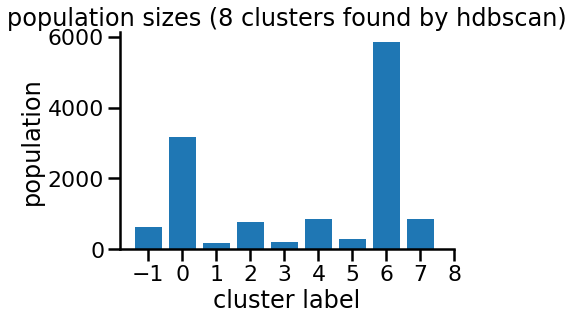

In [368]:
# get the population sizes
label_counts = Counter(hdbs.labels_)
xs, ys = [], []
for k,v in label_counts.items():
    xs.append(k)
    ys.append(v)

# draw the chart
plt.bar(xs, ys)

plt.xticks(range(-1, len(label_counts)))
plt.ylabel('population')
plt.xlabel('cluster label')
plt.title('population sizes ({} clusters found by hdbscan)'.format(len(label_counts) - 1));
sns.despine()

In [369]:
strongest_features(hdbs, vec, topk=15)

Cluster 0: <-url-> sports mma fan god rip life i'm follow man like world one twitter account 
Cluster 1: mma <-url-> want get muslim life sports twitter free one new way good keep never 
Cluster 2: mma <-url-> sports fan like love world life i'm ... instagram boxing news man ufc 
Cluster 3: mma ufc life <-url-> news things #ufc living know get love bad good people nothing 
Cluster 4: mma fan <-url-> sports love i'm good time ufc like life god football shit talk 
Cluster 5: mma <-url-> sports fan football love follow twitter ufc world like music lover boxing ... 
Cluster 6: follow born shit baseball college former player one world dont khabib take back always family 
Cluster 7: <-url-> mma ... fan life love sports boxing god things account news instagram football music 


In [291]:
np.unique(unique_bios).shape

(10137,)

### Fit UMAP

In [318]:
import umap

In [319]:
reducer = umap.UMAP()

In [320]:
embedding = reducer.fit_transform(bio_matrix.todense())
embedding.shape

(12834, 2)

In [324]:
def get_plottable_df(users, bios, two_d_coords, labels):
    """
    Combine the necessary pieces of data to create a data structure that plays
    nicely with the our 2d tsne chart.

    Note: assumes that all argument data series
    are in the same order e.g. the first user, bio, coords, and label
    all correspond to the same user.
    """
    # set up color palette
    num_labels = len(set(labels))
    colors = sns.color_palette('hls', num_labels).as_hex()
    color_lookup = {v:k for k,v in zip(colors, set(labels))}
    # combine data into a single df
    df = pd.DataFrame({'uid': users,
                       'text': bios,
                       'label': labels,
                       'x_val': two_d_coords[:,0],
                       'y_val': two_d_coords[:,1],
                      })
    # convert labels to colors
    df['color'] = list(map(lambda x: color_lookup[x], labels))
    return df

Text(0.5, 1.0, 'UMAP projection of the dataset')

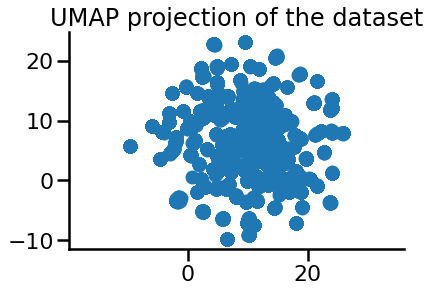

In [323]:
plt.scatter(
    embedding[:, 0],
    embedding[:, 1],
#     c=[sns.color_palette()[x] for x in penguins.species_short.map({"Adelie":0, "Chinstrap":1, "Gentoo":2})]
)
plt.gca().set_aspect('equal', 'datalim')
plt.title('UMAP projection of the dataset', fontsize=24)

In [370]:
hdbs_plottable_bios = get_plottable_df(unique_users, unique_bios, embedding, hdbs.labels_)
hdbs_plottable_bios.head()

,uid,text,label,x_val,y_val,color
0,2280530800,XO’ | @Manutd,6,11.484271,12.527514,#5f57db
1,1227917482070953986,"20 .\nLive , Love, Laugh 💙🎨🦄",-1,9.544705,2.279582,#db57a7
2,3180381502,I train jiujitsu,6,10.609161,12.470556,#5f57db
3,1113861692805525507,,6,12.194442,13.356846,#5f57db
4,1258648224,"The good, the bad, Allhamdulilah for it all.",-1,21.299284,7.650805,#db57a7


In [371]:
hdbs_plottable_bios.head()

,uid,text,label,x_val,y_val,color
0,2280530800,XO’ | @Manutd,6,11.484271,12.527514,#5f57db
1,1227917482070953986,"20 .\nLive , Love, Laugh 💙🎨🦄",-1,9.544705,2.279582,#db57a7
2,3180381502,I train jiujitsu,6,10.609161,12.470556,#5f57db
3,1113861692805525507,,6,12.194442,13.356846,#5f57db
4,1258648224,"The good, the bad, Allhamdulilah for it all.",-1,21.299284,7.650805,#db57a7


In [329]:
from bokeh.plotting import figure, ColumnDataSource, show
from bokeh.models import HoverTool
from bokeh.palettes import brewer, Viridis256

Loading BokehJS ...

In [330]:
def plot_umap(df, title='Umap plot'):
    # add our DataFrame as a ColumnDataSource for Bokeh
    plot_data = ColumnDataSource(df)
    # configure the chart
    umap_plot = figure(title=title, plot_width=800, plot_height=700, tools=('pan, box_zoom, reset'))
    # add a hover tool to display words on roll-over
    umap_plot.add_tools(
        HoverTool(tooltips = """<div style="width: 400px;">(@label) @text</div>""")
    )
    # draw the words as circles on the plot
    umap_plot.circle('x_val', 'y_val',
                     source=plot_data,
                     color='color',
                     line_alpha=0.2,
                     fill_alpha=0.1,
                     size=7,
                     hover_line_color='black')
    # configure visual elements of the plot
    umap_plot.title.text_font_size = '12pt'
    umap_plot.xaxis.visible = False
    umap_plot.yaxis.visible = False
    umap_plot.grid.grid_line_color = None
    umap_plot.outline_line_color = None
    return umap_plot

In [332]:
show(plot_umap(hdbs_plottable_bios.sample(5000),
               't-sne projection of kmeans-clustered users ["(cluster #) bio"]'))

In [ ]:
dict(zip(df_tweets.user.apply(lambda x: 
                            x["id"]).values, df_tweets.user.apply(lambda x: x["description"]).values))

In [335]:
df_tweets.user.apply(lambda x: x["description"])

0                                            XO’ | @Manutd
1                             20 .\nLive , Love, Laugh 💙🎨🦄
2                                         I train jiujitsu
3                                                         
4             The good, the bad, Allhamdulilah for it all.
                               ...                        
16992    A mental picture of a stolen soul. The fornica...
16993    A wolf trapped in human form,trying to find my...
16994    Make sure you come check out the channel and h...
16995    Follow us to get what's going on in the MMA wo...
16996    Small YouTuber. Grinding for success. Check ou...
Name: user, Length: 16997, dtype: object

In [372]:
d_label = dict(zip(hdbs_plottable_bios.uid, hdbs_plottable_bios.label))

In [377]:
d_label

{2280530800: 6,
 1227917482070953986: -1,
 3180381502: 6,
 1113861692805525507: 6,
 1258648224: -1,
 454774938: 6,
 1514346691: -1,
 1263531360385470465: -1,
 1306453312833757184: 6,
 1297601035050061825: -1,
 1035413602625376256: 6,
 1965870001: 6,
 1271488014456324097: -1,
 764322883208220672: -1,
 855187033: -1,
 1320432124583968768: -1,
 219213935: 6,
 808661530979901441: -1,
 818251320167690241: 6,
 430903365: 7,
 3308327506: -1,
 1095680177844244480: 6,
 1176192610823790592: -1,
 757079646827667456: 6,
 376899235: 6,
 771531278: 6,
 465168265: 6,
 485503363: -1,
 990552592509014017: 6,
 2909431407: 6,
 2961638511: -1,
 1235211767841685509: -1,
 850892504937496576: -1,
 264472751: 6,
 2931841965: 6,
 3461997439: 6,
 1315259667338219522: 7,
 788824573340942336: 6,
 119416950: 6,
 343167021: -1,
 2756612194: 7,
 1304780612784607233: 6,
 889648615135875072: -1,
 1317828878: -1,
 4840864901: 6,
 1282299158066458624: 6,
 2733298744: -1,
 1271398146741022724: 6,
 213939207: 6,
 33250276

In [378]:
df_tweets_2["cluster"] = df_tweets_2.user_id.map(d_label)
df_tweets_2["time_st"] = pd.DatetimeIndex(df_tweets_2.created_at)

<ipython-input-378-d41222d17915>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tweets_2["cluster"] = df_tweets_2.user_id.map(d_label)


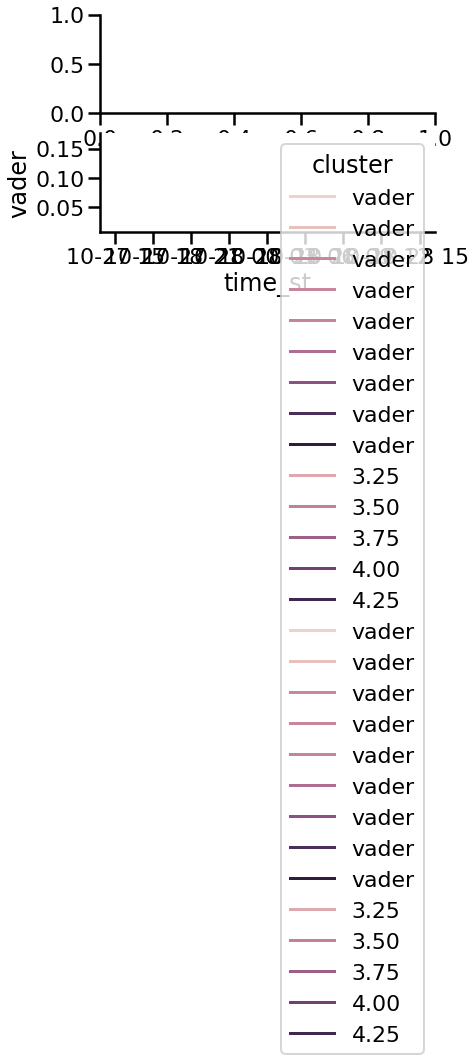

In [390]:
fig, ax = plt.subplots(2, 1)

tmp =  df_tweets_2[["time_st", "cluster", models[0], models[1]]].dropna()
tmp = tmp.set_index("time_st").resample('3H').mean().reset_index()
ax[0] = sns.lineplot(x = "time_st" , y = models[0], hue = "cluster", data = tmp, ci = False , label = models[0])
ax[1] = sns.lineplot(x = "time_st" , y = models[1], hue = "cluster", data = tmp, ci = False , label = models[0])


In [398]:
df_tweets_2.columns

Index(['created_at', 'id', 'retweet_count', 'favorite_count',
       'followers_count', 'friends_count', 'text', 'user_id', 'user_bio',
       'txtblob', 'vader', 'favorite_count_cut', 'cluster', 'time_st'],
      dtype='object')

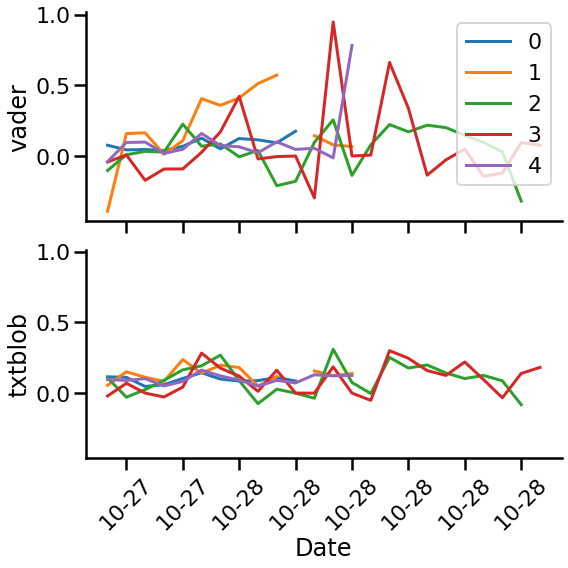

In [410]:
fig, ax = plt.subplots(2, 1, figsize = (8, 8), sharex=True, sharey=True)
for i in range(5):

    tmp = df_tweets_2[df_tweets_2.cluster == i]
    tmp =  tmp[["time_st", "cluster", models[0], models[1]]].set_index("time_st").resample('1H').mean().reset_index()
    sns.lineplot(x = "time_st" , y = models[0],  data = tmp, ci = False , ax = ax[0], label = i)
    ax[1] = sns.lineplot(x = "time_st" , y = models[1], data = tmp, ci = False , ax = ax[1])

date_form = DateFormatter("%m-%d")
ax[1].xaxis.set_major_formatter(date_form)
ax[1].set_xlabel('Date')
# ax[1].set_ylabel('Sentiment score')
# plt.legend(bbox_to_anchor=(.7, 1), loc=2, borderaxespad=0.)
plt.xticks(rotation = 45)
plt.tight_layout()


In [376]:
df_tweets_2.columns

Index(['created_at', 'id', 'retweet_count', 'favorite_count',
       'followers_count', 'friends_count', 'text', 'user_id', 'user_bio',
       'txtblob', 'vader', 'favorite_count_cut'],
      dtype='object')